In [1]:
import AGN_SFE as sfe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc_file('/Users/alexanderescamilla/cassi/Mike_rc_params')

Processing SFE for Distance = 0.1 kpc
Processing SFE for Distance = 0.2 kpc
Processing SFE for Distance = 0.4 kpc
Processing SFE for Distance = 0.6 kpc
Processing SFE for Distance = 0.8 kpc
Processing SFE for Distance = 1.0 kpc
Processing SFE for Distance = 1.2 kpc
Processing SFE for Distance = 1.4 kpc


findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: La

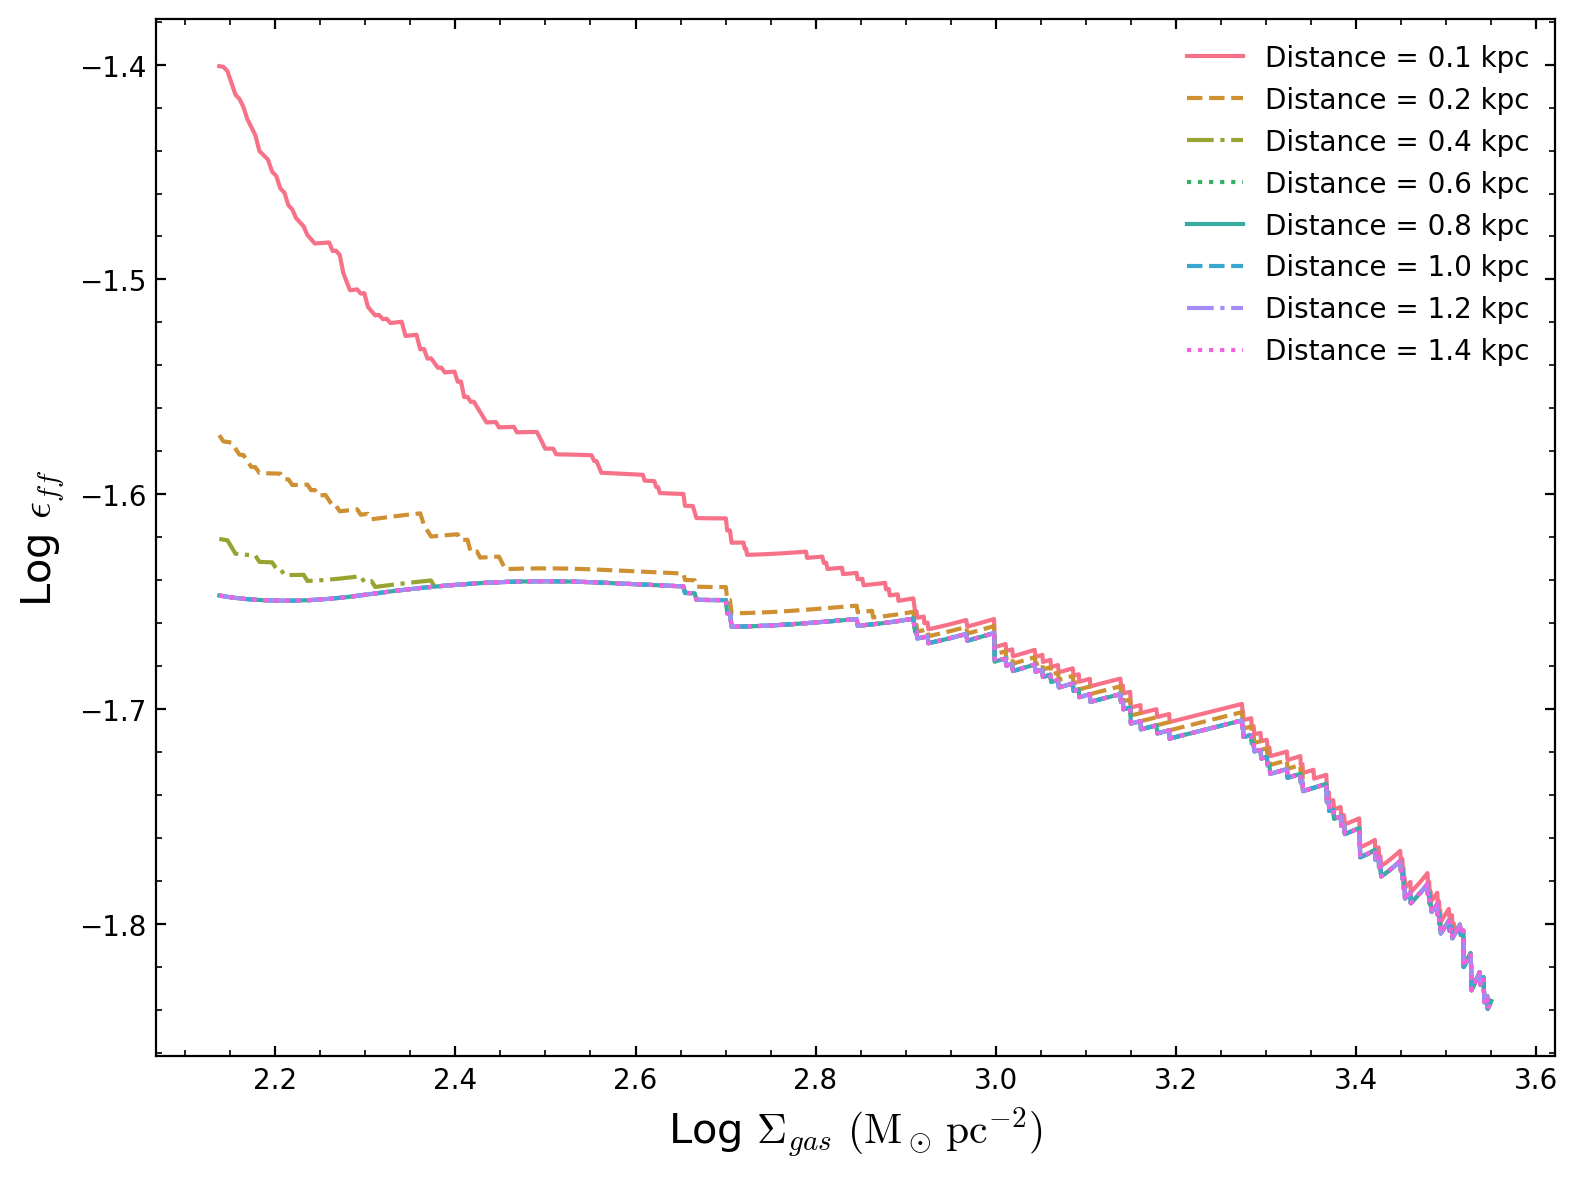

In [8]:


# File paths (update if needed)
file1 = "/Users/alexanderescamilla/cassi/data/snaps/YSOobjects/snapshot_2000.YSOobjects.hdf5"
file2 = "/Users/alexanderescamilla/cassi/data/snaps/snapshot_2000.dustemission.hdf5"

file3 = "/Users/alexanderescamilla/cassi/data/snaps/YSOobjects/snapshot_3500.YSOobjects.hdf5"
file4 = "/Users/alexanderescamilla/cassi/data/snaps/snapshot_3500.dustemission.hdf5"

# Simulation parameters
Box_Size = 100
R_I = 65
R_F = 2500
OUTPATH = "."
RES = 1024

# Distances to compare (in kpc)
distances = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]

# Prepare a list to collect DataFrames for each distance
df_list = []

# Density cutoffs (assuming compute_sfe_values uses a range(R_I, R_F, 1))
density_cutoffs = np.arange(R_I, R_F, 1)

for d in distances:
    print(f"Processing SFE for Distance = {d} kpc")
    
    # Get the arrays from SFE_values by setting return_results=True
    e_ff_range, N_YSOS, Mass_Gass, Area_list, tff = sfe.SFE_values(
        file1, file2, Box_Size, R_I, R_F, OUTPATH, RES, Distance=d, return_results=True
    )
    
    # Build a temporary DataFrame for this distance
    df_temp = pd.DataFrame({
        "DensityCutoffs": density_cutoffs,
        "SFE_linear": e_ff_range,  # \epsilon_ff in linear scale
        "MassGas": Mass_Gass,
        "Area": Area_list,
    })
    
    df_temp["Distance"] = d

    df_temp["SigmaGas_linear"] = df_temp["MassGas"] / df_temp["Area"]
    
    df_temp["logSigmaGas"] = np.log10(df_temp["SigmaGas_linear"].replace(0, np.nan))
    df_temp["logSFE"] = np.log10(df_temp["SFE_linear"].replace(0, np.nan))
    
    df_list.append(df_temp)

# Combine all distances into a single DataFrame
df_all = pd.concat(df_list, ignore_index=True)

plt.figure(figsize=(8, 6))

# Optionally define colors/line styles
line_styles = ["-", "--", "-.", ":"]
colors = sns.color_palette("husl", n_colors=len(distances))

for i, d in enumerate(distances):
    df_subset = df_all[df_all["Distance"] == d]
    
    # Choose line style and color for each distance
    ls = line_styles[i % len(line_styles)]
    color = colors[i % len(colors)]
    
    plt.plot(
        df_subset["logSigmaGas"],
        df_subset["logSFE"],
        linestyle=ls,
        color=color,
        label=f"Distance = {d} kpc"
    )

plt.xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize=15)
plt.ylabel(r"Log $\epsilon_{ff}$", fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("AGN varying distance")
plt.show()





Processing SFE for Distance = 0.1 kpc
Processing SFE for Distance = 0.2 kpc
Processing SFE for Distance = 0.30000000000000004 kpc
Processing SFE for Distance = 0.4 kpc
Processing SFE for Distance = 0.5 kpc
Processing SFE for Distance = 0.6000000000000001 kpc
Processing SFE for Distance = 0.7000000000000001 kpc
Processing SFE for Distance = 0.8 kpc
Processing SFE for Distance = 0.9 kpc
Processing SFE for Distance = 1.0 kpc
Processing SFE for Distance = 1.1 kpc
Processing SFE for Distance = 1.2000000000000002 kpc
Processing SFE for Distance = 1.3 kpc


findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: La

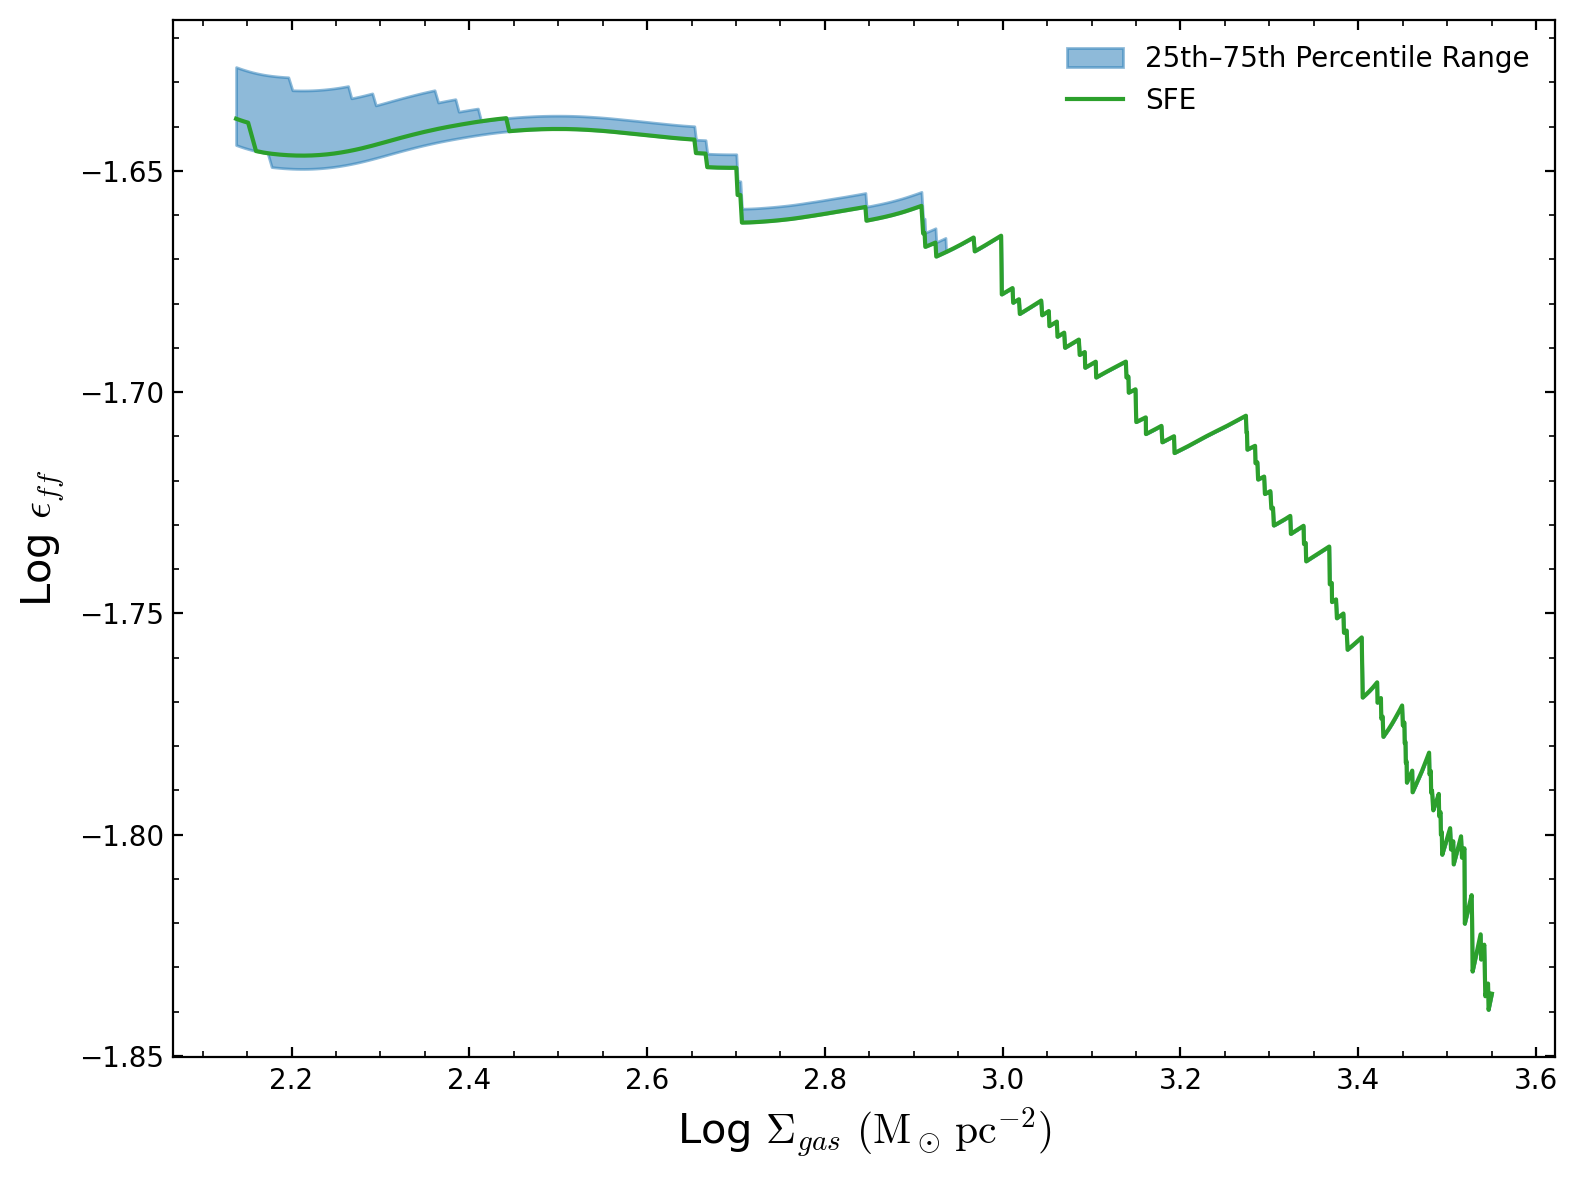

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (update if needed)
file1 = "/Users/alexanderescamilla/cassi/data/snaps/YSOobjects/snapshot_2000.YSOobjects.hdf5"
file2 = "/Users/alexanderescamilla/cassi/data/snaps/snapshot_2000.dustemission.hdf5"
# file3 and file4 are not used in this snippet

# Simulation parameters
Box_Size = 100
R_I = 65
R_F = 2500
OUTPATH = "."
RES = 1024

# Use smaller distance intervals (e.g., 0.2 to 1.2 kpc in steps of 0.1)
distances = np.arange(0.1, 1.4, 0.1)

# Prepare a list to collect DataFrames for each distance
df_list = []

# Density cutoffs (assuming compute_sfe_values uses a range(R_I, R_F, 1))
density_cutoffs = np.arange(R_I, R_F, 1)

for d in distances:
    print(f"Processing SFE for Distance = {d} kpc")
    
    # Get the arrays from SFE_values by setting return_results=True
    e_ff_range, N_YSOS, Mass_Gass, Area_list, tff = sfe.SFE_values(
        file1, file2, Box_Size, R_I, R_F, OUTPATH, RES, Distance=d, return_results=True
    )
    
    # Build a temporary DataFrame for this distance
    df_temp = pd.DataFrame({
        "DensityCutoffs": density_cutoffs,
        "SFE_linear": e_ff_range,  # epsilon_ff in linear scale
        "MassGas": Mass_Gass,
        "Area": Area_list,
    })
    
    df_temp["Distance"] = d
    df_temp["SigmaGas_linear"] = df_temp["MassGas"] / df_temp["Area"]
    
    # Calculate logarithms, replacing zeros with NaN to avoid -inf values
    df_temp["logSigmaGas"] = np.log10(df_temp["SigmaGas_linear"].replace(0, np.nan))
    df_temp["logSFE"] = np.log10(df_temp["SFE_linear"].replace(0, np.nan))
    
    df_list.append(df_temp)

# Combine all distances into a single DataFrame
df_all = pd.concat(df_list, ignore_index=True)

# Group by DensityCutoffs across all distances
# (For each density cutoff we now have many values from the different distances)
grouped = df_all.groupby("DensityCutoffs").agg({
    "logSigmaGas": "median",  # Use median logSigmaGas for x-axis value
    "logSFE": [lambda x: np.percentile(x, 25),
               lambda x: np.percentile(x, 75),
               "median"]
}).reset_index()
# Flatten the MultiIndex columns
grouped.columns = ["DensityCutoffs", "logSigmaGas", "logSFE_25", "logSFE_75", "logSFE_median"]

plt.figure(figsize=(8, 6))

# Plot the 25th-75th percentile range as a filled region
plt.fill_between(grouped["logSigmaGas"],
                 grouped["logSFE_25"],
                 grouped["logSFE_75"],
                 color='tab:blue', alpha=0.5,
                 label='25th–75th Percentile Range')

# Plot the median SFE as a solid line
plt.plot(grouped["logSigmaGas"],
         grouped["logSFE_median"],
         color='tab:green', linestyle='-', label='SFE')

plt.xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize=15)
plt.ylabel(r"Log $\epsilon_{ff}$", fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("AGN_percentile")
plt.show()


In [42]:
df_all["Distance"] == 0.6

0        False
1        False
2        False
3        False
4        False
         ...  
14605    False
14606    False
14607    False
14608    False
14609    False
Name: Distance, Length: 14610, dtype: bool

In [36]:
X, Y, Surface_Den, new_den, dust_coords = sfe.read_dust_data(file2)

In [48]:
len(Surface_Den)

1024

In [49]:
df_06 = df_all[df_all["Distance"] == 0.6].copy()
M_total = np.sum(new_den * (Box_Size / RES)**2)
M_Gas_array = df_06["MassGas"]
SFE_array = df_06["logSFE"]

findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Latin Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: La

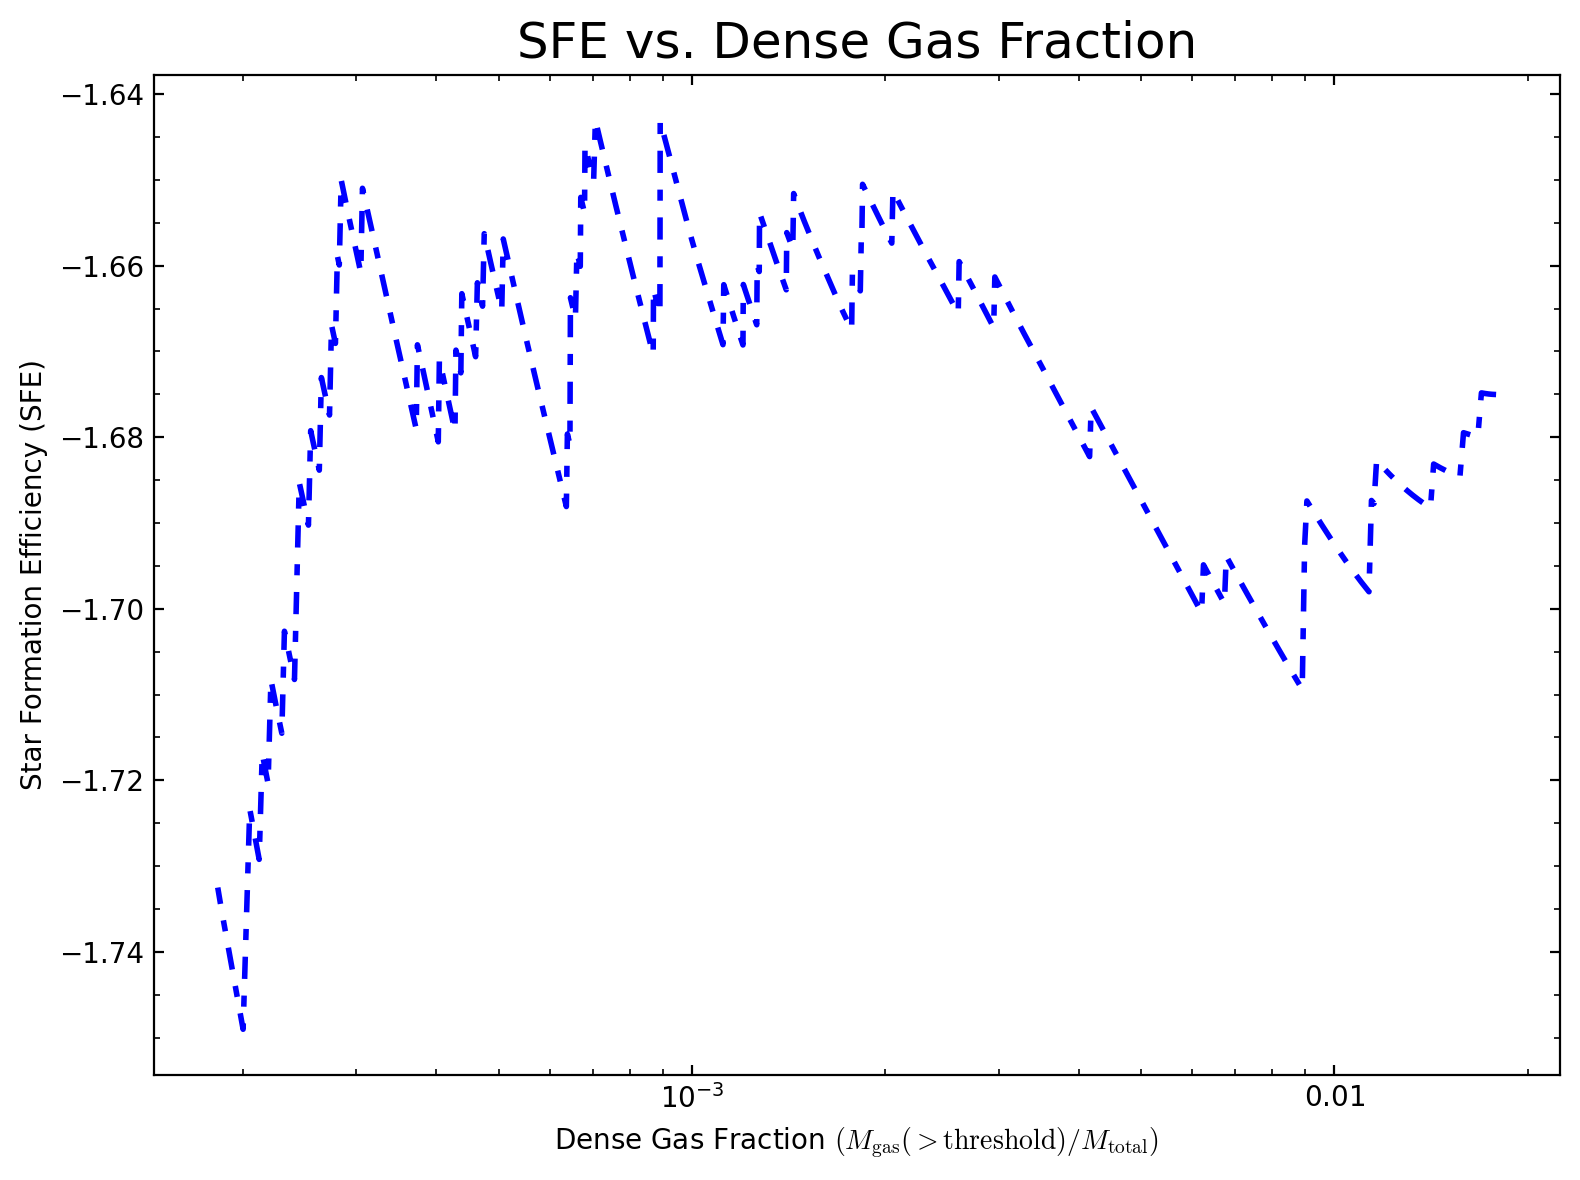

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot the data with customized style using a custom dash pattern.
# The dash pattern is defined as (offset, (dash_length, space_length, dash_length, space_length, ...)).
# For example, (0, (4, 3, 2, 3)) will give you a line with segments of 4, then 2, with 3 points of space in between.
plt.plot(
    dense_fraction, 
    SFE_array,           # Circle marker
    linestyle=(0, (4, 3, 2, 3)),  # Custom dash pattern
    color='blue',     # Built-in matplotlib color
    markersize=8,         # Increase marker size
    linewidth=2,          # Thicker line
    label="My Data",
)

# Axis labels and title
plt.xlabel(r"Dense Gas Fraction $(M_{\mathrm{gas}}(>\mathrm{threshold}) / M_{\mathrm{total}})$")
plt.ylabel("Star Formation Efficiency (SFE)")
plt.title("SFE vs. Dense Gas Fraction", fontsize=18)

# Optionally use log scale for x-axis
plt.xscale('log')

plt.tight_layout()
plt.show()
